
## Project I: Investigate a Dataset - [IMDB Movie Dataset]

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

> **Dataset Description**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), it contains 10866 rows and 26 columns including movies titles and popularity, budget, revenue, ratings..., and more informations that can be useful in our analysis.
>
> **Questions of the Analysis**
>
> 1. What kinds of properties are associated with movies that have high revenues?
>
> 2. Which genres are most popular ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

#### General Properties
First let's take a look at our dataset.

In [ ]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In this section, we will start by printing our dataframe to examine its content, focusing on the data of interest. Next, we will identify and select the columns that we intend to drop to improve the quality of our analysis. Additionally, we will address the need to change the labels of some data columns. Finally, we'll provide information about the shape and data type information for our dataset. It's worth noting that certain columns, such as 'cast' and 'genres,' contain multiple values separated by pipe (|) characters. We will consider how to handle these columns in our analysis.

In [ ]:
print(df.shape)
df.info()

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

we have more than 10k rows and 21 columns in our dataset, but we detect some problems in the quality of our data such as NaN values and datatypes don't match some columns. Lets's check the sum of null values.

In [ ]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In most of the columns, we don't have NaN values, or we have just a few. However, in the 'homepage,' 'tagline,' 'keywords,' and 'production companies' columns, we have between 1000 to 8000 NaN values that need to be addressed. Let's also check for duplicated values.

In [ ]:
df.duplicated().sum()

1

Fortunately, we have 1 duplicated value, and we'll handle it. Now, let's look at the summary of our data.

In [ ]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It seems the half of budget and revenue values are zeros (0), and thats not good for our numerical analysis, runtime and popularity also. And also we have some huge values and the same columns. so we have outliers problem and we have to deal with it.

It seems we have some problems with the 'release date' column. As you can see below, there are 32 values with '60,' which could cause issues if we convert the column to a datetime format. For example, '2060' would be interpreted as the year. To prevent this, it's better to drop this column. To prevent this, it's better to drop this column. I will include the conversion code as a comment following [this tutorial](https://stackoverflow.com/questions/58327249/change-date-format-of-pandas-column-month-day-year-to-day-month-year). and [This one cas well](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).

In [ ]:
df['release_date'].str.contains('/60', regex=False).sum()

# df['Release date'] = pd.to_datetime(df['Release date'])
# df['Release date'] = df['Release date'].dt.year

32

#### Data Quality
- Column labels are not suitable.
- 'cast' and 'genres' contain multiple values separated by pipe (|) characters.
- There are too many NaN values in the data.
- We have 1 duplicated value.
- Many outliers are present in the data.
- Some columns don't have the proper data types, such as date columns.
- We have a duplicated date column.

### Data Cleaning (Wrangling)
First, we will drop the columns that are not needed, which will help us handle NaN values. Then, we will modify the labels of the columns and capitalize them.

The improvements involve minor formatting and grammar changes for clarity.

In [ ]:
columns_rm = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','release_date', 'budget_adj', 'revenue_adj']
df.drop(columns=columns_rm, axis=1, inplace=True)
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.capitalize()

Let's check.

In [ ]:
df.head(3)

,Popularity,Budget,Revenue,Original title,Runtime,Genres,Vote count,Vote average,Release year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


In [ ]:
print(df.shape)
df.isnull().sum()

(10866, 9)


Popularity         0
Budget             0
Revenue            0
Original title     0
Runtime            0
Genres            23
Vote count         0
Vote average       0
Release year       0
dtype: int64

Now we have fewer duplicated values, with rows remaining the same but fewer columns. Let's proceed to drop the NaN values, focusing on the 'Genres' column. Don't forget to also remove duplicated values.

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Let's print the 1st 5 rows.

In [ ]:
df.head()

,Popularity,Budget,Revenue,Original title,Runtime,Genres,Vote count,Vote average,Release year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


Now we'll visualize the distribution of our data.

In [ ]:
sns.set_theme()

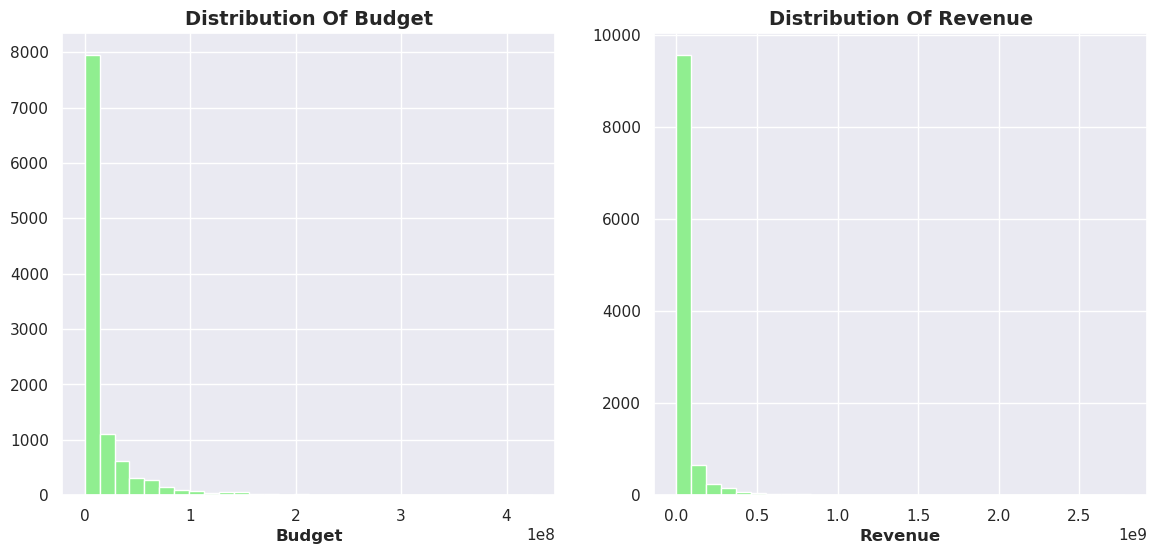

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

def plot_hist(ax, xvar, data, color=None):
    """Function to plot hitograms in a specific axes"""
    ax.hist(x=xvar, data=data, bins=30, color=color)
    ax.set_xlabel(f'{xvar}'.title(), fontsize=12, weight="bold")
    ax.set_title(f'Distribution of {xvar}'.title(), fontsize=14, weight="bold")

plot_hist(ax[0], 'Budget', df, "lightgreen")
plot_hist(ax[1], 'Revenue', df, "lightgreen")
plt.show()

As we can see, the Revenue and the budget data are right skewed, it's because of the 0 values in these columns. Let's visualize them in the boxplot.

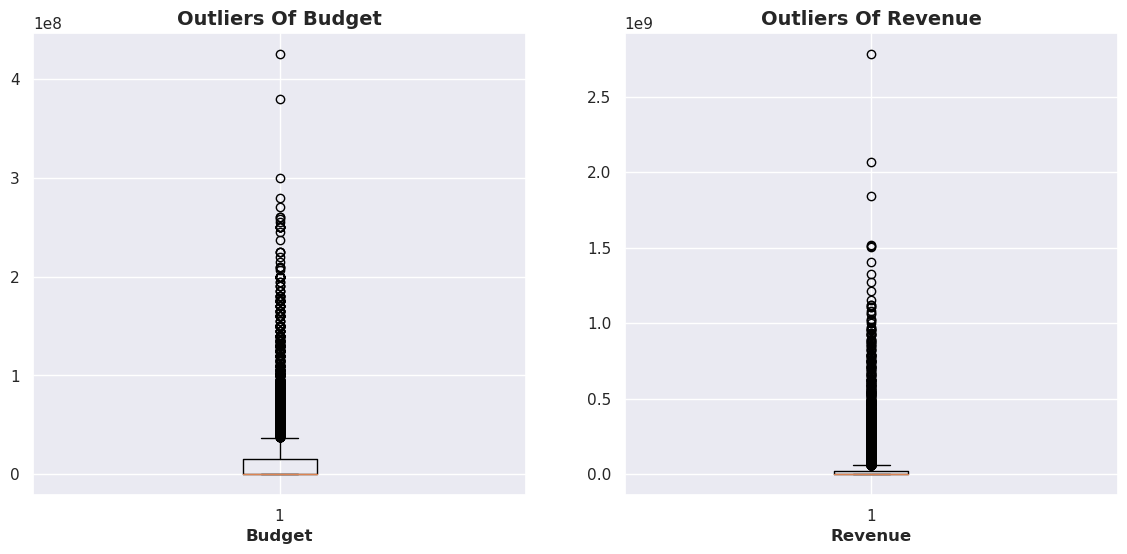

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

def plot_boxplot(ax, xvar, data):
    """Function to plot boxplot in a specific axes"""
    ax.boxplot(x=xvar, data=data)
    ax.set_xlabel(f'{xvar}'.title(), fontsize=12, weight="bold")
    ax.set_title(f'Outliers of {xvar}'.title(), fontsize=14, weight="bold")

plot_boxplot(ax[0], 'Budget', df)
plot_boxplot(ax[1], 'Revenue', df)
plt.show()

Similar to the histograms, we can observe many outliers, primarily due to the presence of zeros in the columns. Let's also check the other columns for outliers.

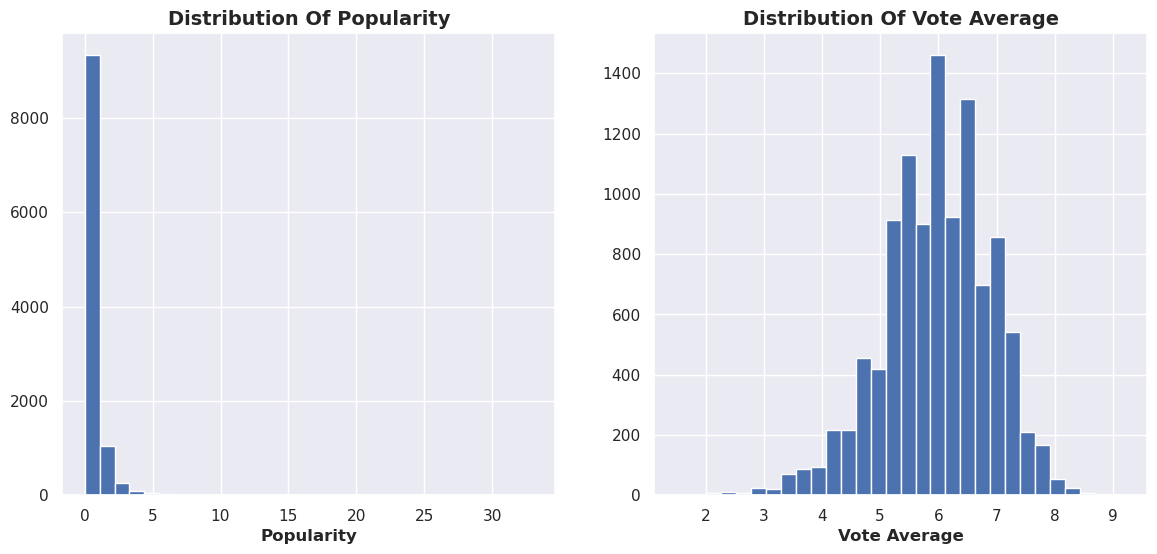

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_hist(ax[0], 'Popularity', df)
plot_hist(ax[1], 'Vote average', df)
plt.show()

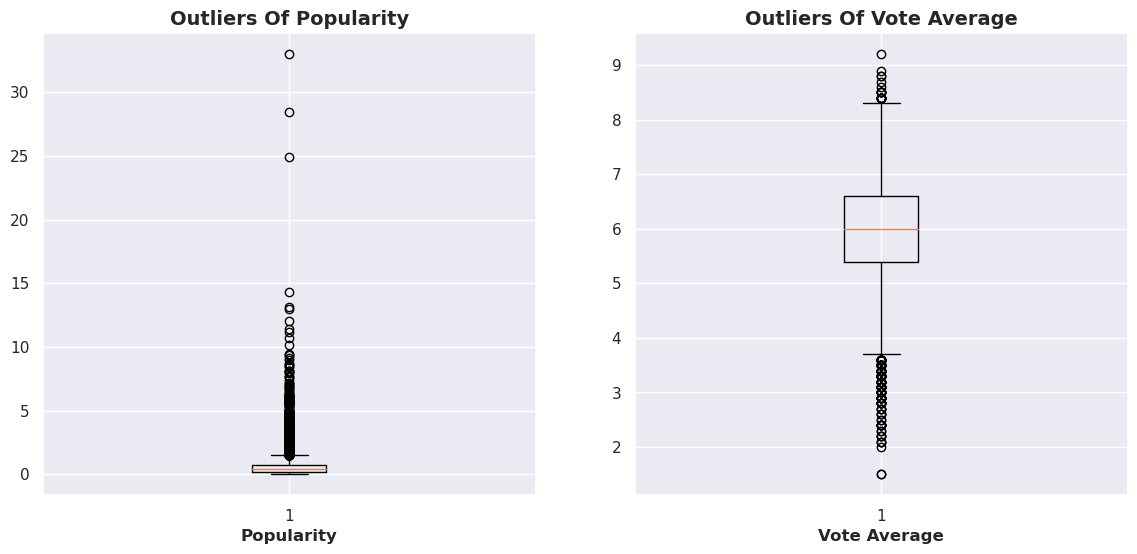

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_boxplot(ax[0], 'Popularity', df)
plot_boxplot(ax[1], 'Vote average', df)
plt.show()

And we encounter a similar issue with the 'popularity' column. About half of the 'popularity' column contains values around 0.3 and below, while a few have values ranging from 9 to 30. This distribution is likely due to changes in popularity over time, resulting in a right-skewed distribution with numerous outliers. In contrast, the 'vote average' follows a normal distribution.

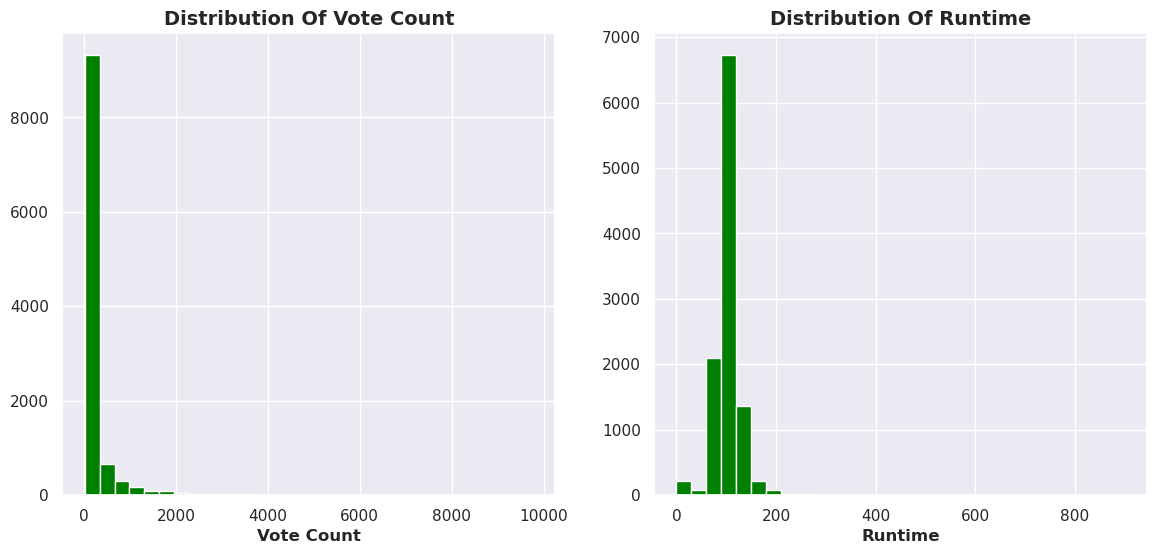

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_hist(ax[0], 'Vote count', df, "green")
plot_hist(ax[1], 'Runtime', df, "green")
plt.show()

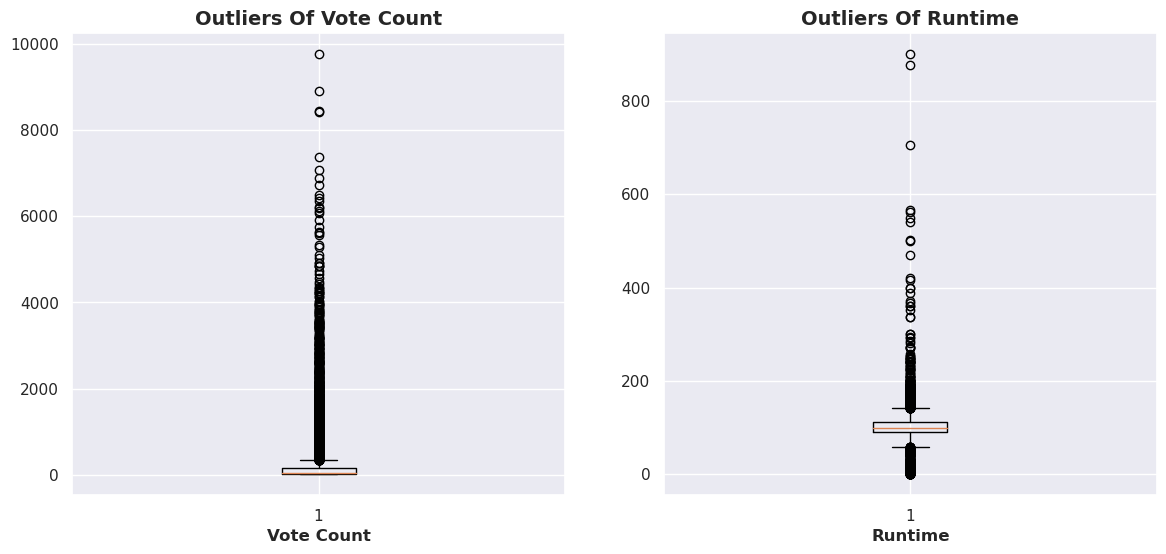

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_boxplot(ax[0], 'Vote count', df)
plot_boxplot(ax[1], 'Runtime', df)
plt.show()

The distribution of the 'vote count' is right-skewed, and it exhibits numerous outliers. Additionally, the 'runtime' column contains some 0 values that need to be addressed. Replacing these 0 values with the mean could alter the distribution and introduce bias into our analysis. Therefore, we will use 'np.nan' (which pandas will ignore and not include in any analysis) to handle these 0 values.

In [ ]:
df["Budget"].replace({0 : np.nan}, inplace=True)
df["Revenue"].replace({0 : np.nan}, inplace=True)
df["Runtime"].replace({0 : np.nan}, inplace=True)
df.describe()

,Popularity,Budget,Revenue,Runtime,Vote count,Vote average,Release year
count,10842.000000,5.168000e+03,4.849000e+03,10812.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,3.074552e+07,8.923886e+07,102.421846,217.823649,5.974064,2001.314794
std,1.001032,3.890583e+07,1.620801e+08,30.871363,576.180993,0.934257,12.813617
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.208210,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000
50%,0.384532,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.715393,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


it seems good but not enough, we have some outliers max, min values.

In [ ]:
df[df['Budget'] > 350000000]

,Popularity,Budget,Revenue,Original title,Runtime,Genres,Vote count,Vote average,Release year
2244,0.25054,425000000.0,1.108757e+07,The Warrior's Way,100.0,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010
3375,4.95513,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure|Action|Fantasy,3180,6.3,2011


In [ ]:
df["Budget"].replace({425000000.0 : 42000000}, inplace=True)

In [ ]:
df.head()

,Popularity,Budget,Revenue,Original title,Runtime,Genres,Vote count,Vote average,Release year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015


Let's check again the distribution of our dataset.

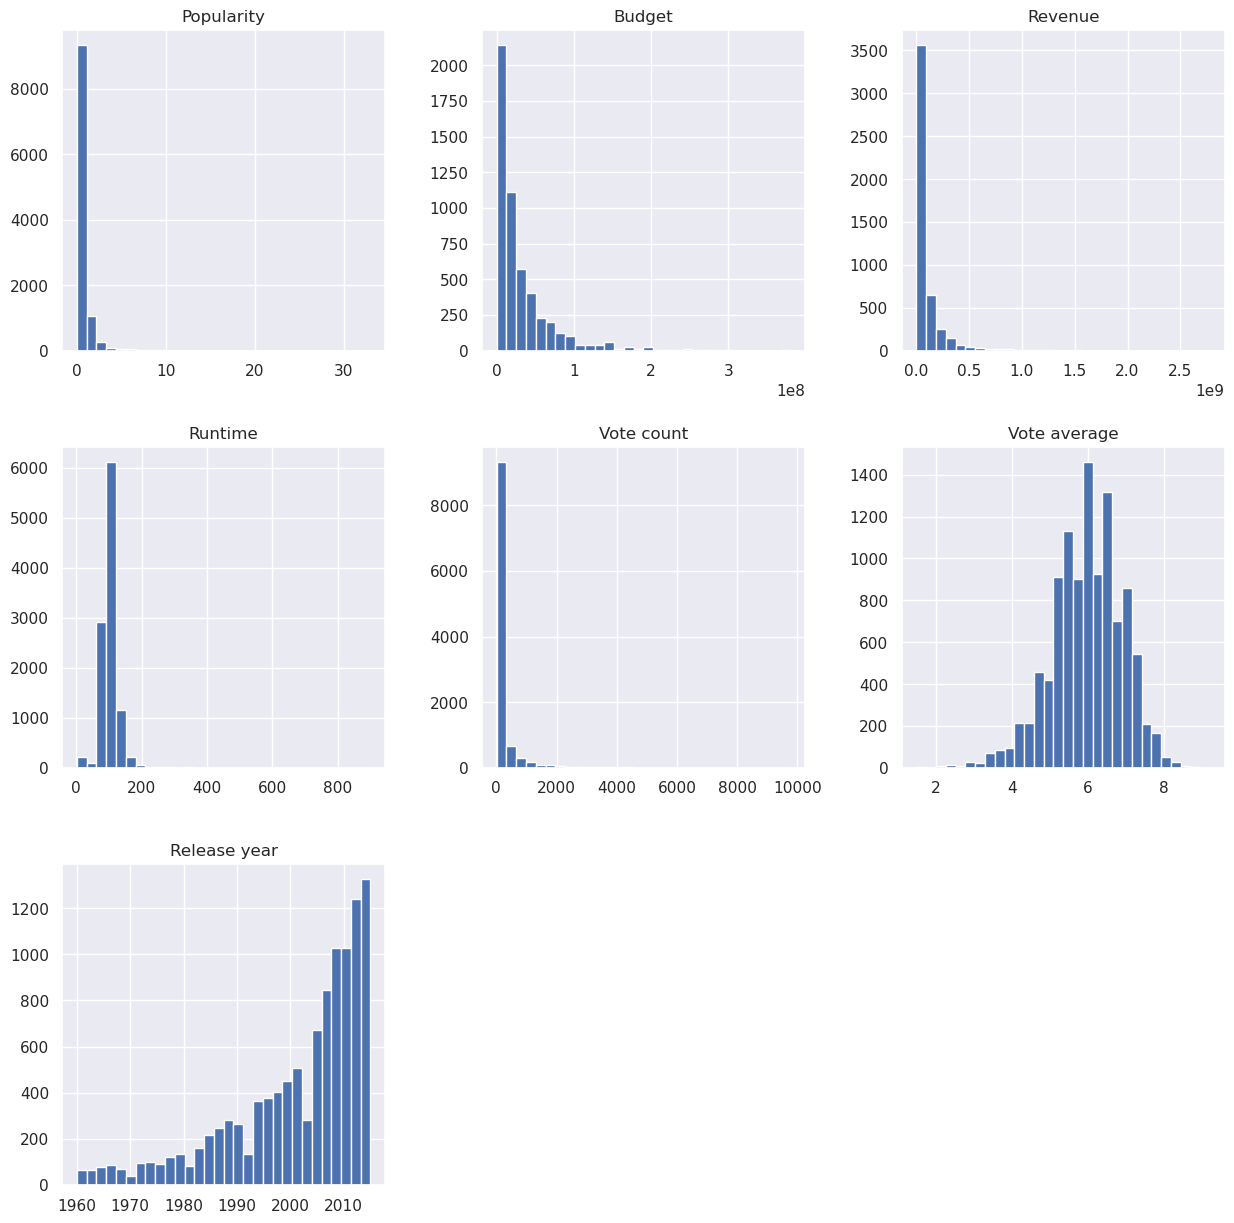

In [ ]:
df.hist(bins=30,figsize=(15,15))
plt.show()

Our data is still right-skewed due to the presence of many small values (outliers) and a few extremely large values, particularly in the 'budget' and 'revenue' columns. Now, let's proceed to deal with the 'Genres' column.

In [ ]:
genres_df = df.assign(Genres=df['Genres'].str.split('|')).explode('Genres')
genres_df.head(10)

,Popularity,Budget,Revenue,Original title,Runtime,Genres,Vote count,Vote average,Release year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,5562,6.5,2015
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Adventure,5562,6.5,2015
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Science Fiction,5562,6.5,2015
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Thriller,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,6185,7.1,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Adventure,6185,7.1,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Science Fiction,6185,7.1,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Thriller,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure,2480,6.3,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Science Fiction,2480,6.3,2015


We have split the strings in the 'Genres' column into categories and assigned them to a new DataFrame to address our research questions. Now, it's time to conduct some Exploratory Data Analysis.

<a id='eda'></a>
### Exploratory Data Analysis

> After we've trimmed and cleaned our data, we have to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1 : What kinds of properties are associated with movies that have high revenues?
First let's check the correlation between our varriables.


In [ ]:
corrMatrix = df.corr()
corrMatrix

,Popularity,Budget,Revenue,Runtime,Vote count,Vote average,Release year
Popularity,1.000000,0.485839,0.629305,0.136384,0.800786,0.210432,0.090200
Budget,0.485839,1.000000,0.697529,0.268546,0.586686,0.091723,0.215895
Revenue,0.629305,0.697529,1.000000,0.237748,0.764113,0.206847,0.121388
Runtime,0.136384,0.268546,0.237748,1.000000,0.162542,0.155995,-0.112860
Vote count,0.800786,0.586686,0.764113,0.162542,1.000000,0.254698,0.108275
Vote average,0.210432,0.091723,0.206847,0.155995,0.254698,1.000000,-0.119851
Release year,0.090200,0.215895,0.121388,-0.112860,0.108275,-0.119851,1.000000


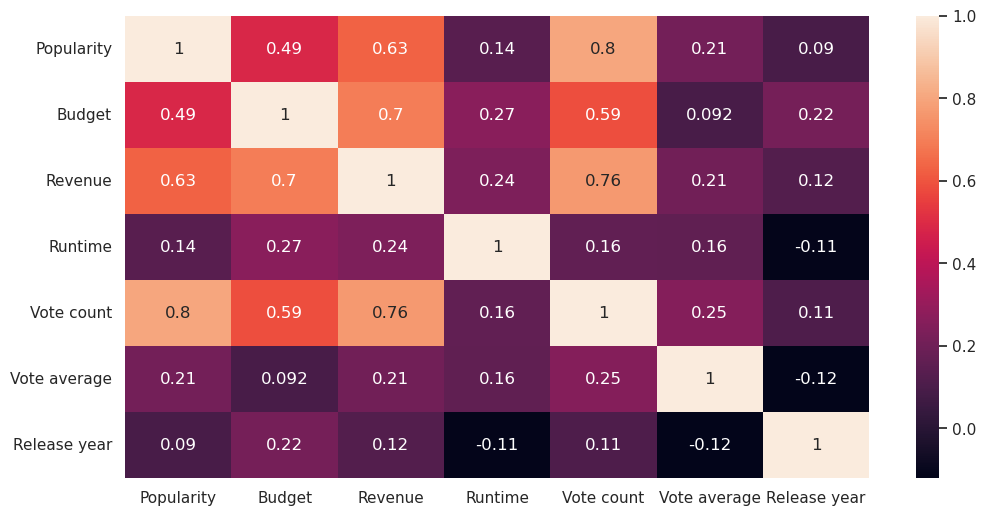

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(corrMatrix, annot=True)
plt.show()

As we can see, here are the most interessting correlations:
> Revenue and Budget, Revenue and Popularity, Revenue and Vote count and vice versa.

As summary, we can see that the movies with high revenue are popular, they have high budgets and high vote count, but not all the popular movies have high budget there is a correlation but it's medium, popularitty is correlated strongly with vote count and revenue.

> note : Runtime and vote average and Release year don't have a huge impact on the features above.

Now let's visualize them on the scatterplot.

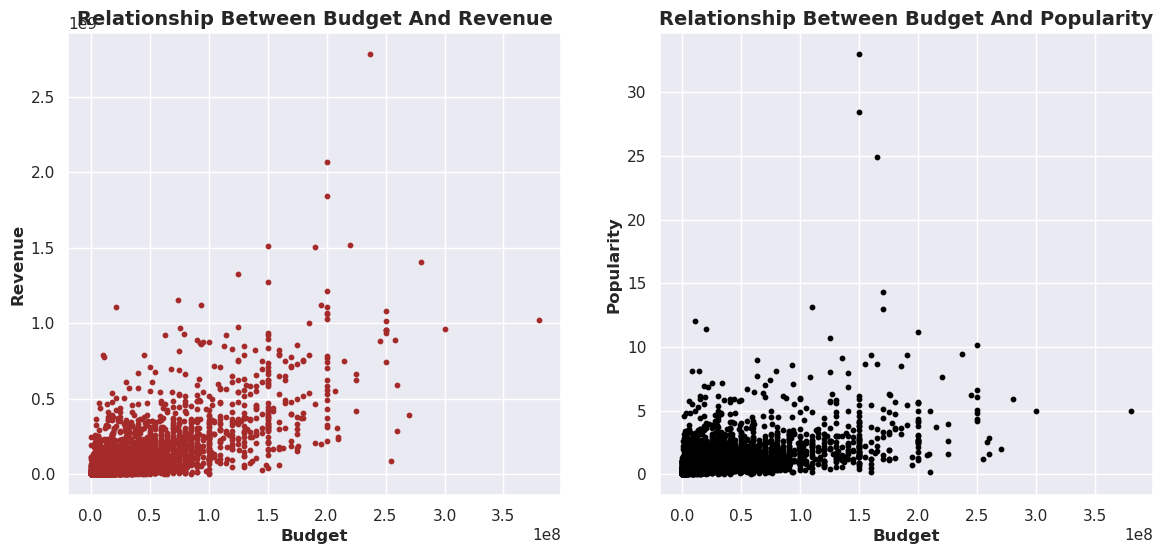

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

def plot_scatter(ax, xvar, yvar, data, color=None):
    """Function to plot scatter plots in a specific axes"""
    ax.scatter(x=xvar, y=yvar, data=data, s=10, color=color)
    ax.set_xlabel(f'{xvar}'.title(), fontsize=12, weight="bold")
    ax.set_ylabel(f'{yvar}'.title(), fontsize=12, weight="bold")
    ax.set_title(f'Relationship between {xvar} and {yvar}'.title(), fontsize=14, weight="bold")

plot_scatter(ax[0], 'Budget', 'Revenue', df, 'brown')
plot_scatter(ax[1], 'Budget', 'Popularity', df, 'black')
plt.show()

As we interpreted from the correlation matrix, there is a strong correlation between revenue and budget, as well as a medium relationship between popularity and budget.

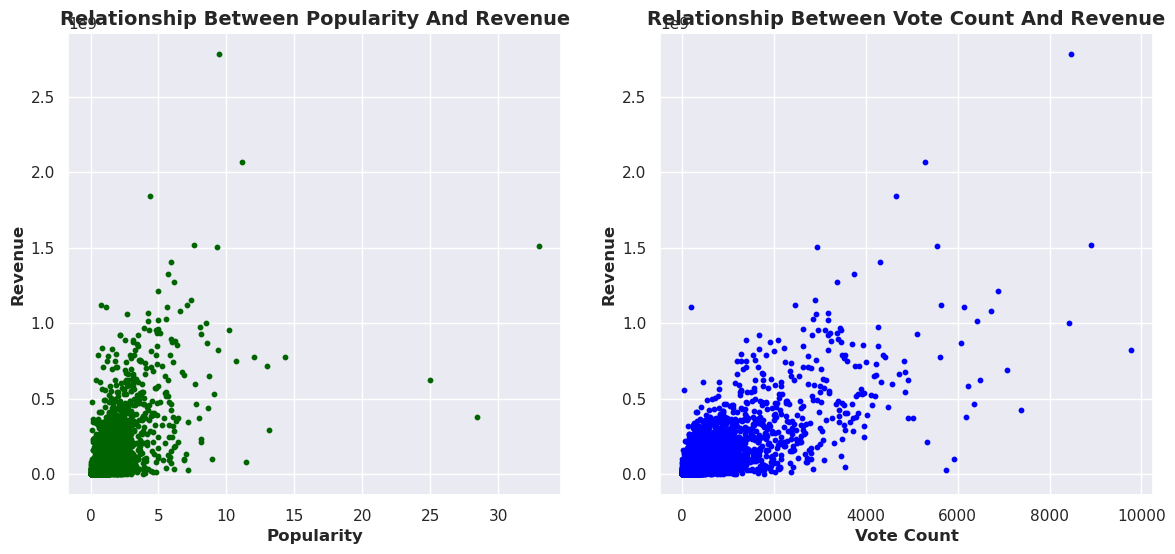

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_scatter(ax[0], 'Popularity', 'Revenue', df, 'darkgreen')
plot_scatter(ax[1], 'Vote count', 'Revenue', df, 'blue')
plt.show()

As we see, if the popularity increases the revenue increase, and the same with vote count.

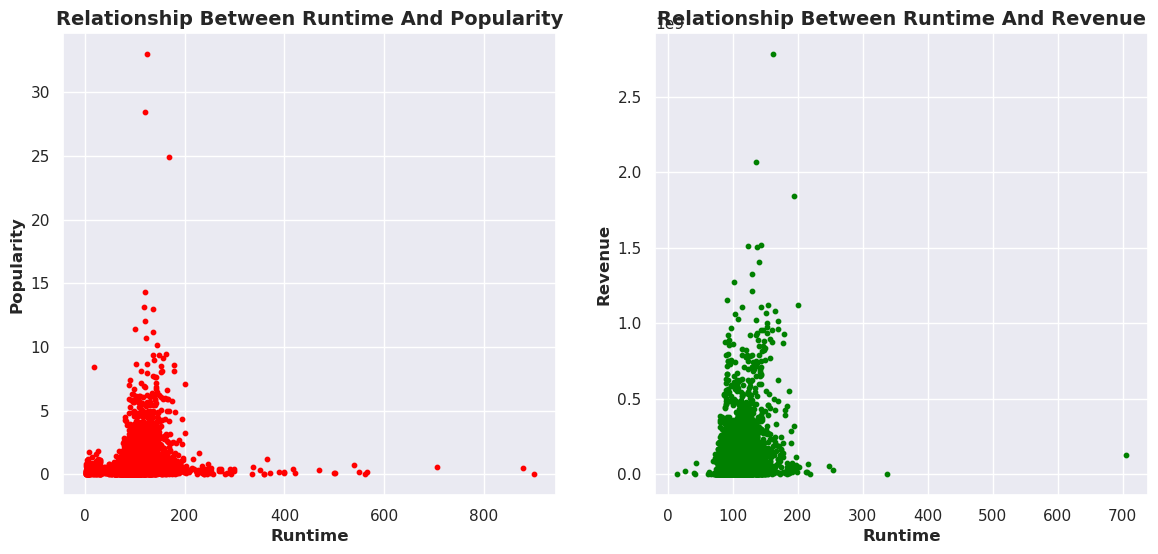

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_scatter(ax[0], 'Runtime', 'Popularity', df, 'red')
plot_scatter(ax[1], 'Runtime', 'Revenue', df, 'green')
plt.show()

As we can see, there isn't a strong correlation between runtime and popularity or revenue. We observe that the majority of movies have a duration ranging from 0 to approximately 300 minutes, and interestingly, within this interval, there are both popular and unpopular movies. Now, let's proceed to plot the changes in our data over time.

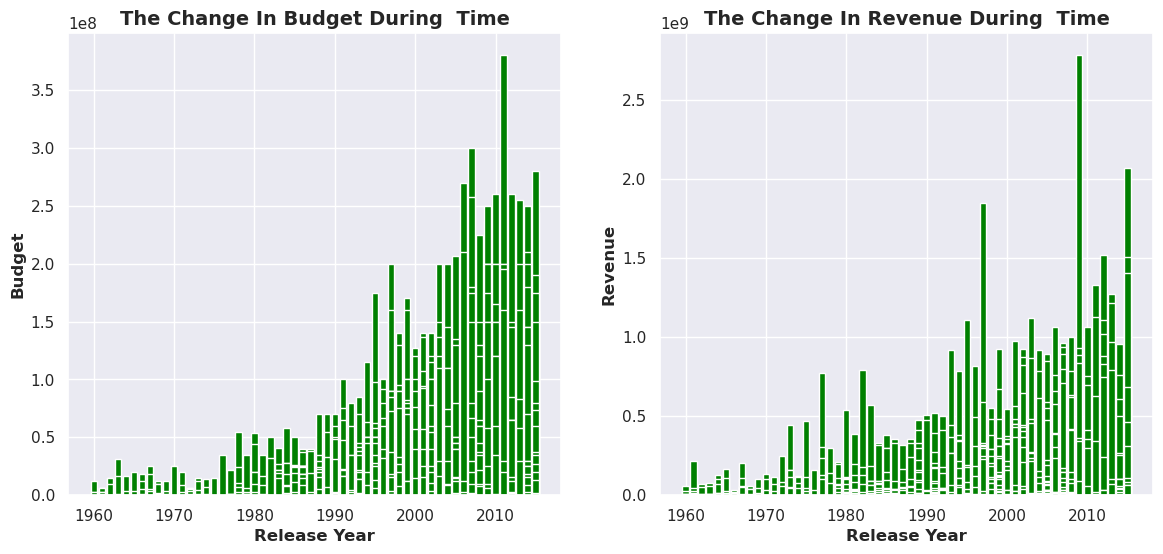

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

def plot_bar(ax, xvar, yvar, data, color=None):
    """Function to plot bars plots in a specific axes"""
    ax.bar(x=xvar, height=yvar, data=data, width=0.8, color=color)
    ax.set_xlabel(f'{xvar}'.title(), fontsize=12, weight="bold")
    ax.set_ylabel(f'{yvar}'.title(), fontsize=12, weight="bold")
    ax.set_title(f'the change in {yvar} during  time'.title(), fontsize=14, weight="bold")

plot_bar(ax[0], 'Release year', 'Budget', df, 'green')
plot_bar(ax[1], 'Release year', 'Revenue', df, 'green')
plt.show()

The movies' budgets are incresing by time, each year we see more budgets for the movie industry, and we can say the same thing for the revenues, they are also increasing year by year along with budgets.

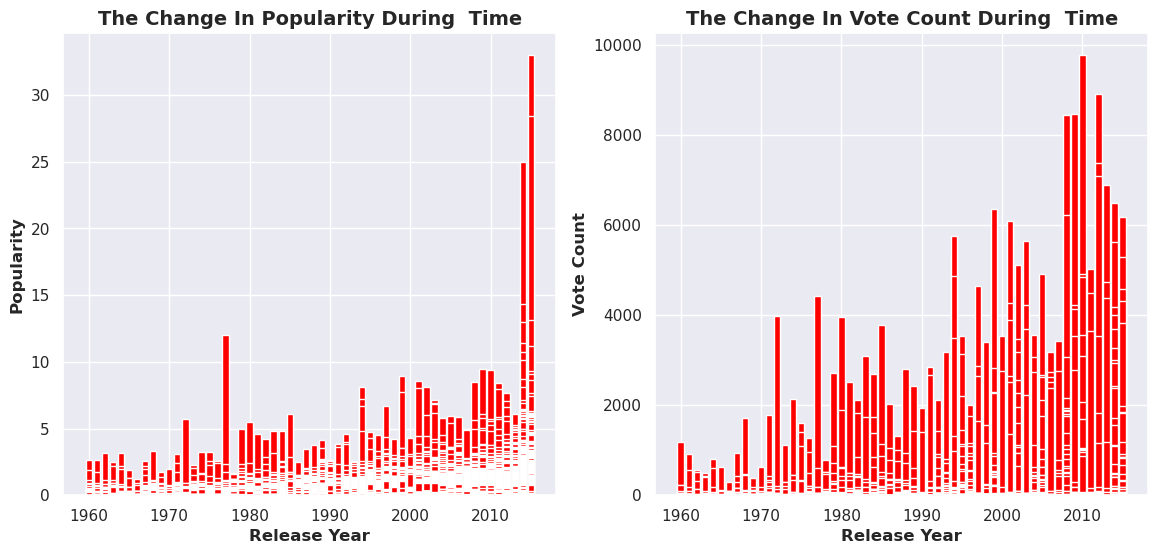

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

plot_bar(ax[0], 'Release year', 'Popularity', df, 'red')
plot_bar(ax[1], 'Release year', 'Vote count', df, 'red')
plt.show()

The popularity of movies increases by time (we observe some high values which they may be outliers), the movies are becoming more popular, and more people are participating in voting and rating as we see in the figures.

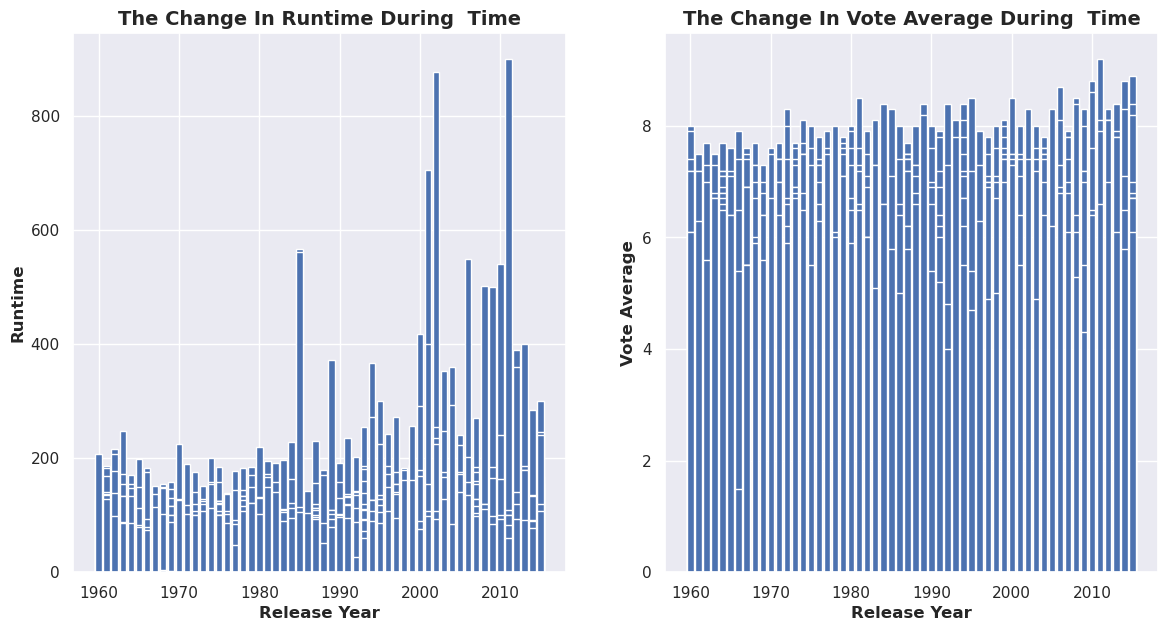

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

plot_bar(ax[0], 'Release year', 'Runtime', df)
plot_bar(ax[1], 'Release year', 'Vote average', df)
plt.show()

There is a little change in runtime, the average duration from 1960 to 1980 was about 200 min in max, but after 1980 we observe more long durations maybe they are series, there is no change in vote average. Now let's return to the revenue and the budget.

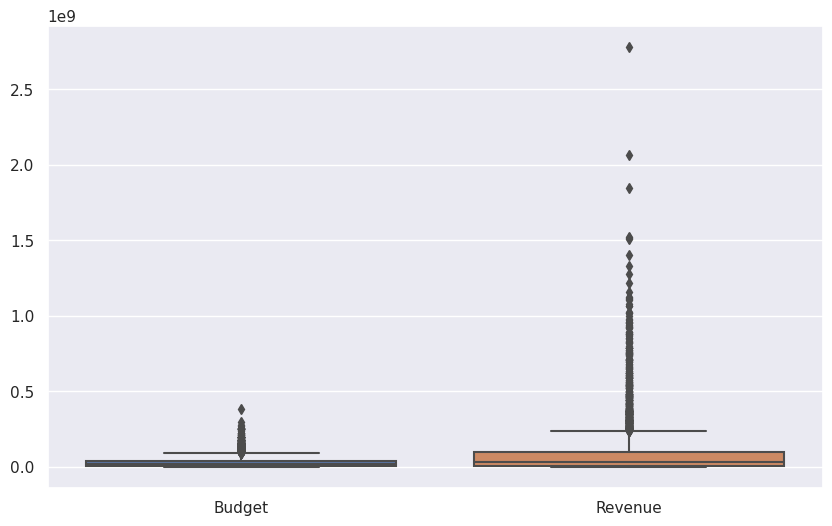

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[['Budget', 'Revenue']])
plt.show()

The movie industry can make an important revenue, in general there is a huge difference between the revenues and the budgets as you can see from the plot.

### Research Question 2  : Which genres are most popular ?
its time to explore Genres, previously we made the genres dataframe (genres_df), let's use it.

In [ ]:
genres_df.Genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: Genres, dtype: int64

It seems the most of movies in our dataset are Drama, Comedy, Thriller, Action genres, as you see above. Let's explore the popularity by grouping by genres and see the specefic features of the best genres, like popularity, vote average and so on...

In [ ]:
genres_df.groupby('Genres').Popularity.mean()

Genres
Action             0.926274
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744930
Documentary        0.181432
Drama              0.591495
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001548
TV Movie           0.270896
Thriller           0.741563
War                0.727683
Western            0.590615
Name: Popularity, dtype: float64

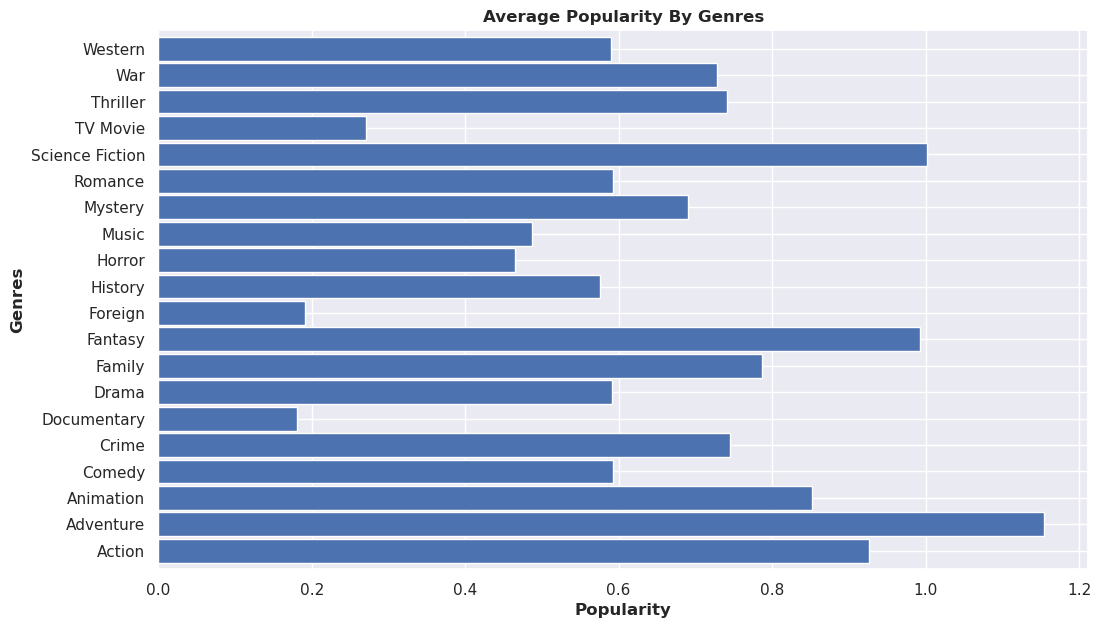

In [ ]:
def group_barhplot(cat, feature):
    """This function will groupby a category and plot it against its feature by using the mean for our DataFrame"""
    genres_df.groupby('Genres').Popularity.mean().plot.barh(width=0.9, rot=0)
    ax.set_title(f'Average {feature} By {cat}'.title(), fontsize=12, weight="bold")
    ax.set_xlabel(f'{feature}'.title(), fontsize=12, weight="bold")
    ax.set_ylabel(f'{cat}'.title(), fontsize=12, weight="bold")

fig, ax = plt.subplots(figsize=(12,7))
group_barhplot('Genres', 'Popularity')
plt.show()

As we see from the plot, the most popular genres are Adventure, Fantasy, Science Fiction, Action and also Animation, these Genres are the most popular with a high popularity rate. Now let's see the vote average.

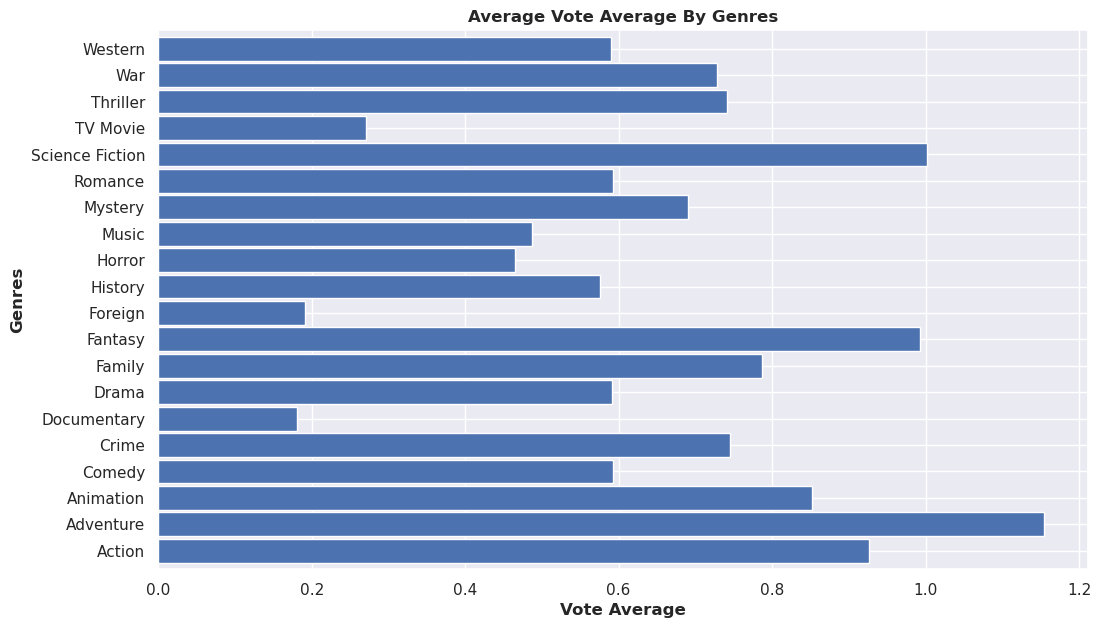

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
group_barhplot('Genres', 'Vote average')
plt.show()

As we see, we can say the same thing for the vote average, the same popular Genres have the best average rates. Let's check the vote count.

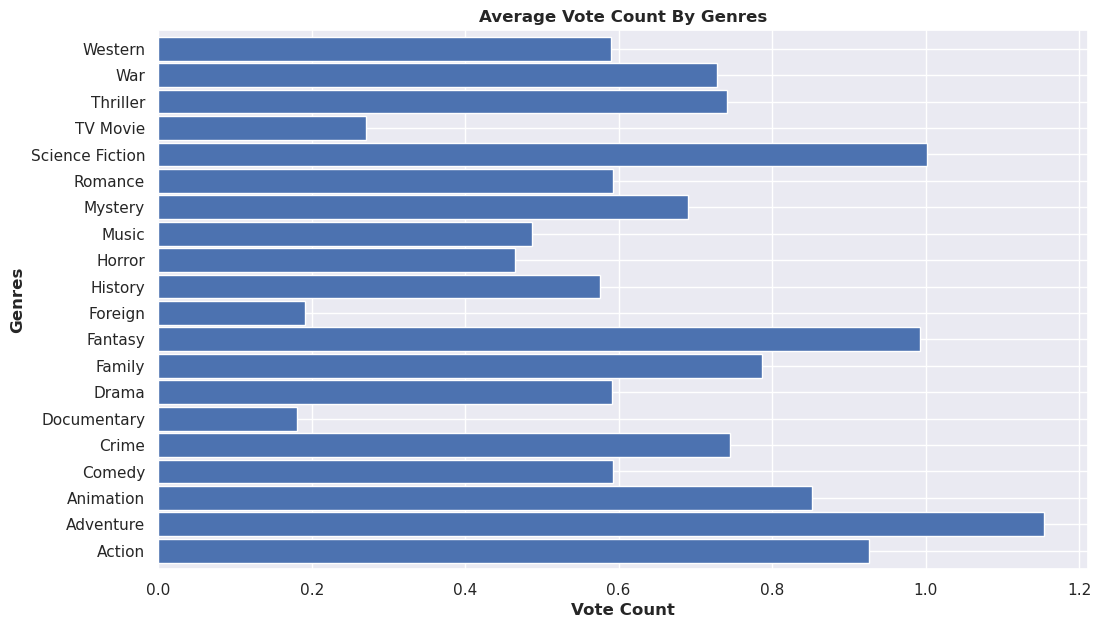

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
group_barhplot('Genres', 'Vote count')
plt.show()

Adventure, Fantasy, Science Fiction, Action and also Animation, again they have a high votes, so we can say people like these genres the most. Let's check the budget.

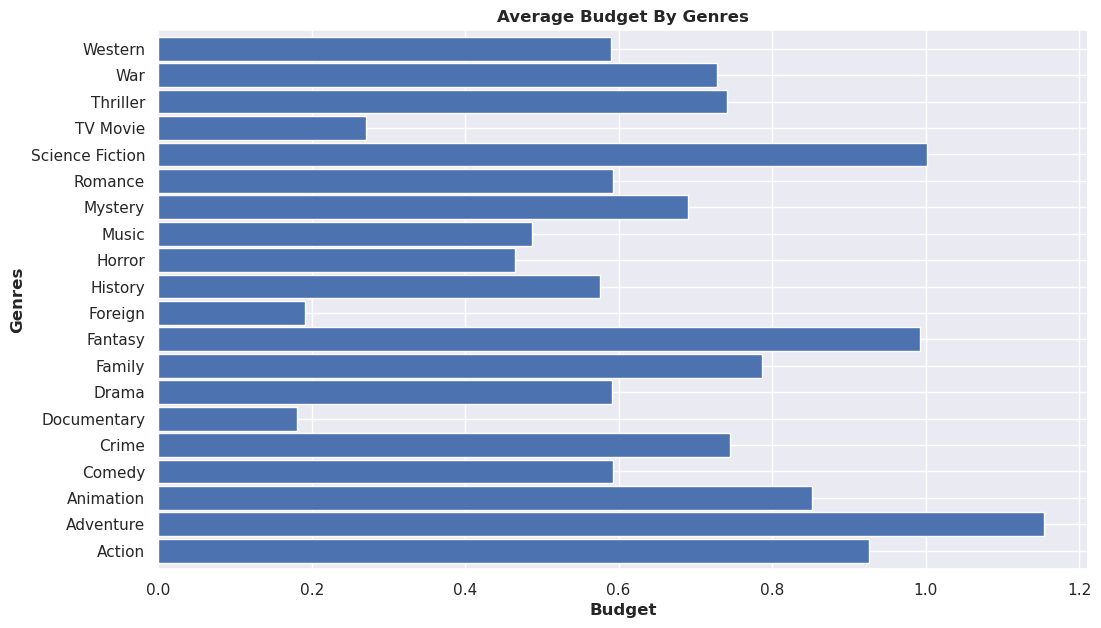

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
group_barhplot('Genres', 'Budget')
plt.show()

In terms of budget, these genres are the most expensive genres, with a huge budget on them, let's check their revenues.

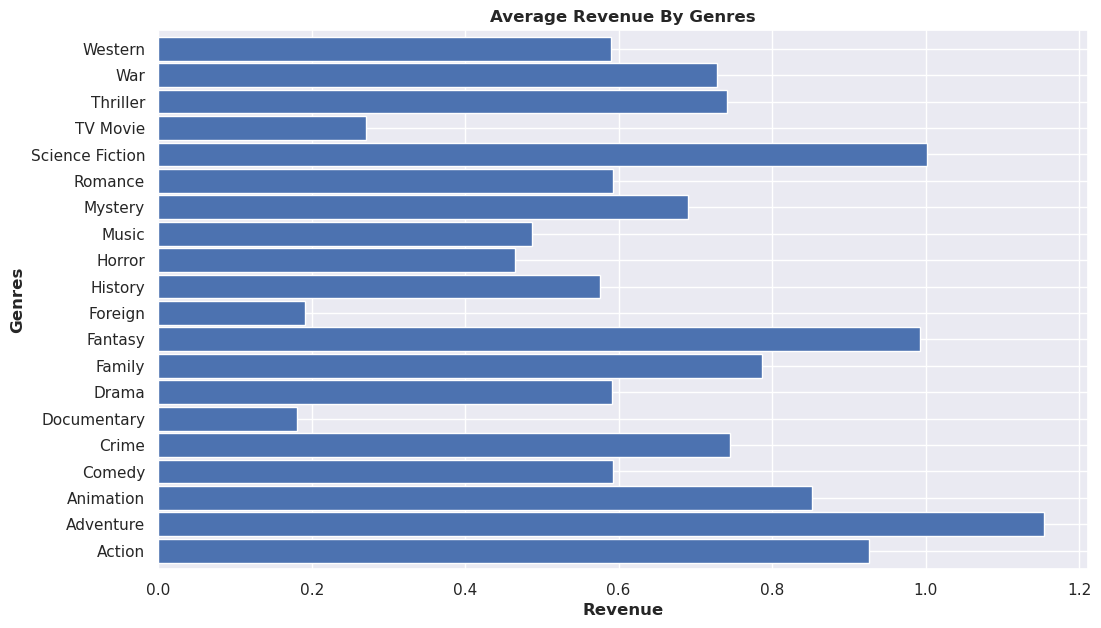

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
group_barhplot('Genres', 'Revenue')
plt.show()

And yeah, as we said before, there is a strong correlationbetween budget and revenue, especially for these genres, they can make a huge revenues as they are popular and as there is a huge amount of work and budgets on them.

<a id='conclusions'></a>
### Conclusions
This work, while not yet complete, represents my efforts to analyze a dataset, using various resources and methods to better understand its contents. I began by examining the dataset's structure and contents and formulated research questions to guide my analysis. Subsequently, I identified several data quality issues, including column labels, character separation in the genres column, NaN values, duplicated entries, outliers, and a duplicated date column with outliers.

The next phase involved addressing these problems. I started by removing unnecessary columns and modifying the labels of the remaining columns. This helped in dealing with NaN values, and I successfully removed duplicated entries. However, the challenge arose when handling outliers, especially values close to zero, which significantly affected the quality of our analysis. Replacing these values with NaN was a partial solution, but addressing values near zero required further consideration.

The third phase of the analysis focused on exploring the data using statistical measures and visualizations. I created a correlation matrix to identify interesting relationships between variables. Notably, strong correlations existed between revenue and budget, revenue and popularity, and revenue and vote count, among others. In summary, higher budgets and popularity correlated positively with higher revenues, indicating that successful movies tend to be popular, well-funded, and attract more votes.

To further investigate these relationships, I generated scatterplots that reinforced the patterns observed in the correlation matrix. The exploration also included time-based analysis, revealing trends such as the growth of budgets and revenues over time, increased vote counts, and the gradual rise in popularity. There were also indications of outliers, potentially influencing the analysis.

Finally, I addressed the second research question: the most popular genres. Adventure, Fantasy, Science Fiction, Action, and Animation emerged as the most popular genres, characterized by high popularity, vote averages, vote counts, and budgets. These genres consistently outperformed others in terms of revenue generation.

However, one significant challenge throughout this analysis was dealing with the small values in the revenue and budget columns, where values ranged from millions down to very small numbers. This skewed the distribution, potentially impacting the robustness of our analysis.

In conclusion, this analysis provides valuable insights into the dataset, but further refinement and handling of small values are necessary for a more comprehensive understanding of the movie industry's dynamics.